# 2.31 Pandas - Типы и структура данных
[Типы данных Numpy](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.str_)

[Типы данных Pandas (больше Numpy, есть экспериментальная часть)](https://pandas.pydata.org/docs/reference/arrays.html)


In [51]:
# подключение пакетов
import pandas as pd, numpy as np, seaborn as sb
import random as rd, scipy.sparse
from ipywidgets import interact, fixed
from IPython.display import display

## Стилизация представления
[Styling](https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/style.html)

In [52]:
def coloring(data):
    # стилизация заголовков таблицы
    thp=[('font-size','16px'),('text-align','center'),
         ('text-shadow','2px 2px 2px whitesmoke'),('color','#fff'),
         ('padding','5px 5px'),('background-color','darkslategray')]
    # стилизация данных таблицы
    tdp=[('font-size','12px'),('padding','5px 5px'),
         ('text-align','right'),('text-shadow','3px 3px 3px #aaa'),
         ('background-color','whitesmoke')]
    style_dict = [dict(selector='th',props=thp),
                  dict(selector='td',props=tdp)]
    c = ['darkred','darkgreen','darkblue']
    color = lambda x: 'color: %s'%(
        c[0]*(x<0)+c[1]*(x==0)+c[2]*(x>0))
    return display(pd.DataFrame(data).style.\
           set_table_styles(style_dict).applymap(color))

In [53]:
# базовая функция для интерактивного варианта
def idf(df, h_neg ,h_pos, s, l):
    cmap = sb.palettes.diverging_palette(
               h_neg=h_neg, h_pos=h_pos, s=s, l=l, as_cmap=True)
    dstyle = [{'selector':'th',
               'props':[('padding','5px 5px'),('font-size','12px'),
                        ('text-align','center')]},
              {'selector':"th:hover",
                'props':[('font-size','14pt'),('color','darkcyan')]}]
    return df.style.background_gradient(cmap=cmap).set_table_styles(dstyle)

## Объекты разной размерности
### Серия `1D` `Series` 
одномерный индексированный массив, хранящий данные любого (но единственного!) типа 
- целые, действительные или комплексные числа
- строковые данные разной природы 
- последовательности (списки, кортежи и пр.)
- более сложные объекты Python
- ...

In [54]:
# создание из списка или кортежа с индексированием по умолчанию
chess = ['♔','♕','♖','♗','♘','♙']
schess1 = pd.Series(chess)
# из массива ndarray
schess2 = pd.Series(np.random.randn(6), index=chess)
display(schess1), coloring(schess2);

0    ♔
1    ♕
2    ♖
3    ♗
4    ♘
5    ♙
dtype: object

,0
♔,1.233324
♕,-1.170988
♖,-0.136784
♗,1.751427
♘,-1.360167
♙,2.508312


In [55]:
# обращение к элементу по индексу или 
# к его номеру по порядку в серии
schess1[0], schess2['♔'], schess2[0], \
schess1.dtype, schess2.dtype

('♔', 1.2333243716362685, 1.2333243716362685, dtype('O'), dtype('float64'))

In [56]:
# из словаря, тип данных dtype - object
schess3 = pd.Series(
    {'♔':[1,2],'♕':[2,3],'♖':[3,4],'♗':4,'♘':5,'♙':6})
3*schess3

♔    [1, 2, 1, 2, 1, 2]
♕    [2, 3, 2, 3, 2, 3]
♖    [3, 4, 3, 4, 3, 4]
♗                    12
♘                    15
♙                    18
dtype: object

In [57]:
# точность временных данных в серии
series_minute = pd.Series(
    range(3), pd.DatetimeIndex(
        ["2011-12-31 23:59:00","2012-01-01 00:00:00","2012-01-01 00:02:00"]))
series_minute.index.resolution,series_minute

('minute', 2011-12-31 23:59:00    0
 2012-01-01 00:00:00    1
 2012-01-01 00:02:00    2
 dtype: int64)

In [58]:
series_minute["2011-12-31 23"],\
series_minute["2011-12-31 23:59"],\
series_minute["2011-12-31 23:59:00"]

(2011-12-31 23:59:00    0
 dtype: int64, 0, 0)

### Рамка данных `2D` `DataFrame`
- двумерная индексированная структура данных (электронная таблица)
- со столбцами потенциально разных типов

Типы входных данных:
- словарь одномерных массивов, списков, словарей или серий
- двумерный массив
- структурированный заранее массив
- одиночный массив, серия, словарь и пр.
- другая рамка данных
- ...


In [59]:
# из структурированного заранее массива
# различия модулей в автоматическом определении типа данных
dt = [("col 1", "i4"), ("col 2", "f4"), ("col 3", "a10")]
arr = np.zeros((2,), dtype=dt) # col 3 => b""
arr[:] = [(1, 2., "row 1"), (2, 3., "row 2")]
df = pd.DataFrame(arr)
df.loc[2] = (3, 4., b"row 3") # продолжение в df
display(arr), display(df);

array([(1, 2., b'row 1'), (2, 3., b'row 2')],
      dtype=[('col 1', '<i4'), ('col 2', '<f4'), ('col 3', 'S10')])

,col 1,col 2,col 3
0,1,2.0,b'row 1'
1,2,3.0,b'row 2'
2,3,4.0,b'row 3'


In [60]:
# Примечание: октет - восемь двоичных разрядов
# '...' литералы => последовательность символов Unicode
# b'...' литералы => последовательность октетов (целые числа от 0 до 255)
b'A' == b'\x41', b'A' == 'A', b'\x41'.decode('UTF-8')

(True, False, 'A')

In [61]:
# индексами могут быть даты в определенном интервале
def date_df(m,n): 
    return pd.DataFrame(
        np.random.randn(m, n),
    index=pd.date_range(
        '9/19/2022', periods=m, freq='M').strftime('%Y-%m-%d'),
    columns=[f'col {i+1}' for i in range(n)])
coloring(date_df(3,5))

,col 1,col 2,col 3,col 4,col 5
2022-09-30,-1.558029,-0.793841,1.220872,-0.895533,-1.826970
2022-10-31,2.144012,-0.206771,0.176875,0.157188,-1.489565
2022-11-30,-1.678938,1.161828,-0.359593,-1.020184,0.386843


In [62]:
# из равномерно распределенных значений
linspace_df = lambda a, b, m, n: pd.DataFrame(
    np.linspace(a, b, m * n).reshape(m, n),
    index=[f'id {i+1}' for i in range(m)],
    columns=[f'col {i+1}' for i in range(n)])
coloring(linspace_df(0, 10, 3, 5))

,col 1,col 2,col 3,col 4,col 5
id 1,0.000000,0.714286,1.428571,2.142857,2.857143
id 2,3.571429,4.285714,5.000000,5.714286,6.428571
id 3,7.142857,7.857143,8.571429,9.285714,10.000000


In [63]:
# из матрицы scipy.sparse
mat = scipy.sparse.eye(3)
pd.DataFrame.sparse.from_spmatrix(mat)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [64]:
# из именованных кортежей
from collections import namedtuple as cnt
point = cnt("point", "x y z")
for el in [dir(point)[i:i+5] for i in range(0,45,5)]:
    print(el)
points = [(0, 0, 0), (0, 3, 7), (2, 3, 1)]
coloring(pd.DataFrame([point(*p) for p in points]))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__']
['__doc__', '__eq__', '__format__', '__ge__', '__getattribute__']
['__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__']
['__init_subclass__', '__iter__', '__le__', '__len__', '__lt__']
['__module__', '__mul__', '__ne__', '__new__', '__reduce__']
['__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__']
['__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults']
['_fields', '_fields_defaults', '_make', '_replace', 'count']
['index', 'x', 'y', 'z']


,x,y,z
0,0,0,0
1,0,3,7
2,2,3,1


In [65]:
# из классов данных
from dataclasses import make_dataclass
PointClass = make_dataclass(
    "point", [("x", int), ("y", int), ("z", int)])
for el in [dir(PointClass)[i:i+5] for i in range(0,30,5)]:
    print(el)
points = [(0, 0, 0), (0, 3, 7), (2, 3, 1)]
coloring(pd.DataFrame([PointClass(*p) for p in points],
             index=[f'point {i+1}' for i in range(len(points))]))

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__']
['__dict__', '__dir__', '__doc__', '__eq__', '__format__']
['__ge__', '__getattribute__', '__gt__', '__hash__', '__init__']
['__init_subclass__', '__le__', '__lt__', '__module__', '__ne__']
['__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__']
['__sizeof__', '__str__', '__subclasshook__', '__weakref__']


,x,y,z
point 1,0,0,0
point 2,0,3,7
point 3,2,3,1


In [66]:
# пользовательский класс для создания рамки случайных данных
class DataClassObj(object):
    def __init__(
        self,attr0:int=1,
        attr1:int=0,attr2:float=0.,attr3:str='',
        attr4:list=[],attr5:tuple=()):
        self._hidden = attr0
        self.attr1 = attr1
        self.attr2 = attr2
        self.attr3 = attr3
        self.attr4 = attr4
        self.attr5 = attr5
    @property
    def attr6(self)->float:
        return self.attr2 * self._hidden ** 3 + self.attr1
    def __str__(self)->str:
        os = f'DataClassObj(\n    '
        os += f'attr1={self.attr1}, \n    '
        os += f'attr2={self.attr2}, \n    '
        os += f'attr3={self.attr3}, \n    '
        os += f'attr4={self.attr4}, \n    '
        os += f'attr5={self.attr5}, \n    '
        os += f'attr6={self.attr6} \n)'
        return os 
    @classmethod
    def random_obj(cls):
        return cls(
            attr0=rd.randint(-100,100),
            attr1=rd.randint(-1e6,1e6),
            attr2=rd.random(),
            attr3=rd.choice(list('abcdefghijklmnopqrstuvwxyz')),
            attr4=rd.choices(range(10,99),k=3),
            attr5=tuple(rd.choices(range(10,99),k=3)))
objects = [DataClassObj.random_obj() for _ in range(100)]
object_list = [{**o.__dict__,**{'attr6':o.attr6}} for o in objects]
df = pd.DataFrame.from_dict(object_list)
df.head()

,_hidden,attr1,attr2,attr3,attr4,attr5,attr6
0,72,-385193,0.285309,l,"[15, 19, 15]","(66, 62, 47)",-2.787019e+05
1,-88,-614363,0.570866,j,"[89, 54, 16]","(97, 11, 33)",-1.003392e+06
2,-77,-819717,0.258746,p,"[85, 10, 20]","(79, 98, 38)",-9.378431e+05
3,82,-1771,0.366001,s,"[49, 35, 63]","(91, 74, 13)",2.000302e+05
4,-24,254306,0.740304,z,"[70, 44, 21]","(60, 44, 22)",2.440720e+05


In [67]:
print(objects[0])

DataClassObj(
    attr1=-385193, 
    attr2=0.2853091363862911, 
    attr3=l, 
    attr4=[15, 19, 15], 
    attr5=(66, 62, 47), 
    attr6=-278701.9354620896 
)


### Многомерные объекты `MultiIndex`
иерархическая/многоуровневая индексация для хранения и обработки данных
- с произвольным количеством измерений 
- в структурах с меньшими измерениями `Series` и `DataFrame`

In [68]:
iterables = [[f'id {i+1}' for i in range(4)], 
             ["type 1", "type 2"]]
idx = pd.MultiIndex.from_product(
    iterables, names=["first", "second"])
idx

MultiIndex([('id 1', 'type 1'),
            ('id 1', 'type 2'),
            ('id 2', 'type 1'),
            ('id 2', 'type 2'),
            ('id 3', 'type 1'),
            ('id 3', 'type 2'),
            ('id 4', 'type 1'),
            ('id 4', 'type 2')],
           names=['first', 'second'])

In [69]:
coloring(pd.DataFrame(np.random.randn(8, 8), index=idx))

## Загрузка собранных данных

In [ ]:
# загрузка с жесткого диска
# или просто "перетащить" в раздел "файлы"
from google.colab import files
uploaded = files.upload()

Saving apples_pears.csv to apples_pears.csv


In [ ]:
apples_pears = pd.read_csv("apples_pears.csv")
 # 3 записи сверху
interact(idf,df=fixed(apples_pears.head(3)), 
         h_neg=(0,359,1), h_pos=(0,359,1), s=(0.,99.9), l=(0.,99.9));

interactive(children=(IntSlider(value=179, description='h_neg', max=359), IntSlider(value=179, description='h_…

In [70]:
# по ссылке из внешнего доверенного источника
url='https://raw.githubusercontent.com/pandas-dev/'+\
    'pandas/master/doc/data/tips.csv'
tips = pd.read_csv(url)
tips.tail(3) # 3 записи снизу

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [71]:
# загрузка из внешних источников c urllib
import urllib
def get_file(path, folder_path, file_name):
    input_file=urllib.request.urlopen(path+folder_path+file_name)
    output_file=open(file_name,'wb')
    output_file.write(input_file.read())
    output_file.close(); input_file.close()

In [72]:
# испытание get_file на конкретном примере
path = 'https://raw.githubusercontent.com/'
folder_path = 'plotly/datasets/master/'
file_name = '2016-weather-data-seattle.csv'
get_file(path, folder_path, file_name)

In [73]:
# распознавание и преставление временных данных
from datetime import datetime
date_parser = lambda x: datetime.strptime(x, '%m/%d/%Y')

In [74]:
# создание рамки данных с определением даты
weather = pd.read_csv(
    file_name, parse_dates=['Date'], date_parser=date_parser)
print(weather.dtypes)
# удаление записей с отсутствующими данными
weather = weather.dropna()
# определение типов данных для 2 столбцов
weather = weather.astype(
    {'Mean_TemperatureC':'int64',
     'Min_TemperatureC':'int64'})
print(weather.dtypes)
# записи с определенными индексами
weather.take([0,2,4])

Date                 datetime64[ns]
Max_TemperatureC              int64
Mean_TemperatureC           float64
Min_TemperatureC            float64
dtype: object
Date                 datetime64[ns]
Max_TemperatureC              int64
Mean_TemperatureC             int64
Min_TemperatureC              int64
dtype: object


,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
0,1948-01-01,10,8,7
2,1948-01-03,7,4,2
4,1948-01-05,7,3,0


In [75]:
# файлы csv открытого доступа на raw.githubusercontent.com
path='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
     'machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P8/'
# загрузка с ограничением количества строк
data=pd.read_csv(
    path+'turnstile_data_master_with_weather.csv',
    nrows=10**5)
# удаление столбца с индексами (дубликат информации)
data=data.drop('index',axis=1)
data[0:10].T.head(10)

,0,1,2,3,4,5,6,7,8,9
UNIT,R001,R001,R001,R001,R001,R001,R002,R002,R002,R002
DATEn,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01,2011-05-01
TIMEn,01:00:00,05:00:00,09:00:00,13:00:00,17:00:00,21:00:00,01:00:00,05:00:00,09:00:00,13:00:00
Hour,1,5,9,13,17,21,1,5,9,13
DESCn,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR
ENTRIESn_hourly,0.0,217.0,890.0,2451.0,4400.0,3372.0,0.0,42.0,50.0,316.0
EXITSn_hourly,0.0,553.0,1262.0,3708.0,2501.0,2122.0,0.0,66.0,125.0,716.0
maxpressurei,30.31,30.31,30.31,30.31,30.31,30.31,30.31,30.31,30.31,30.31
maxdewpti,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
mindewpti,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0


In [76]:
# загрузка других типов файлов - json
file_path='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
          'data/main/external_json/'
school_edu = pd.read_json(file_path+'h7rb-945c.json')
# отбор столбцов для формирования рамки данных
columns = ['dbn','total_students','graduation_rate','attendance_rate',
           'latitude','longitude','city','council_district']
# удаление записей с отсутствующими значениями
# определение типов данных
school_edu = school_edu[columns]\
.dropna().astype({'council_district':'int'})
# случайная выборка строк
school_edu.sample(3)

,dbn,total_students,graduation_rate,attendance_rate,latitude,longitude,city,council_district
430,08X561,469,0.7,0.78,40.821210,-73.855930,Bronx,18
206,22K611,434,N/A,0.87,40.593157,-73.936635,Brooklyn,48
62,02M439,432,1,0.98,40.741963,-73.991966,Manhattan,3


In [77]:
# загрузка других типов файлов - excel
url= 'https://github.com/datagy/mediumdata/raw/master/Sales.xlsx'
# с указанием наименования таблицы
sales=pd.read_excel(url, sheet_name='West')
sales

,Date,Customer,Sales
0,2022-04-01,A,504
1,2022-04-02,B,361
2,2022-04-03,A,694
3,2022-04-04,B,702
4,2022-04-05,A,255
5,2022-04-06,C,550
6,2022-04-07,A,435
7,2022-04-08,B,724
8,2022-04-09,A,407
9,2022-04-10,B,753


In [78]:
# с указанием нескольких таблиц
saless = pd.read_excel(
    io='https://github.com/datagy/mediumdata/raw/master/Sales.xlsx',
    sheet_name=['East', 'West'])
saless.get('West').head()

,Date,Customer,Sales
0,2022-04-01,A,504
1,2022-04-02,B,361
2,2022-04-03,A,694
3,2022-04-04,B,702
4,2022-04-05,A,255


In [79]:
# из внешних источников одной строкой
!curl -o 1.png https://raw.githubusercontent.com/OlgaBelitskaya/data/main/flowers/12_001.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 93590  100 93590    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k


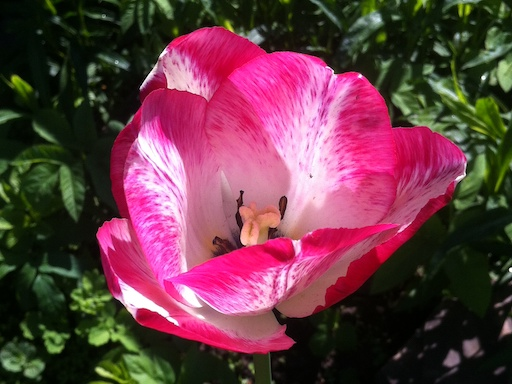

In [80]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('1.png',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [81]:
# многомерный массив, требует иерархического индексирования
print(img.shape)
img[:1,:10,:]

(384, 512, 3)


array([[[0, 4, 0],
        [0, 4, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 5, 0],
        [0, 4, 0]]], dtype=uint8)

In [82]:
img_index = pd.MultiIndex.from_product(
    (*map(range, img.shape[:2]), ('r', 'g', 'b')),
    names=('x', 'y', None))
img_df = pd.Series(img.flatten(), index=img_index)
img_df = img_df.unstack()
img_df = img_df.reset_index().reindex(columns=['x','y','r','g','b'])
coloring(img_df.head(25).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
x,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
r,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,2,3,1,2,3
g,4,4,5,5,5,5,5,5,5,4,4,5,5,4,4,5,5,5,5,5,6,7,8,9,11
b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1


In [83]:
# все html таблицы на данной странице
tables = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
tables[2]

,Location,July (°F),July (°C),January (°F),January (°C)
0,Minneapolis,83/64,28/18,23/7,−4/−13
1,Saint Paul,83/63,28/17,23/6,−5/−14
2,Rochester,82/63,28/17,23/3,−5/−16
3,Duluth,76/55,24/13,19/1,−7/−17
4,St. Cloud,81/58,27/14,18/−1,−7/−18
5,Mankato,86/62,30/16,23/3,−5/−16
6,International Falls,77/52,25/11,15/−6,−9/−21


In [84]:
# чтение таблицы с определенным названием
table = pd.read_html(
    'https://en.wikipedia.org/wiki/Minnesota', 
    match='United States presidential election results for Minnesota')[0]
table = table.replace({'%':''},regex=True)
lst = [('Republican','%'),( 'Democratic','%'),('Third party','%')]
table[lst] = table[lst].apply(pd.to_numeric)
table.head()

Year Republican        Democratic        Third party      
   Year        No.      %        No.      %         No.     %
0  2020    1484065  45.28    1717077  52.40       76029  2.32
1  2016    1323232  44.93    1367825  46.44      254176  8.63
2  2012    1320225  44.96    1546167  52.65       70169  2.39
3  2008    1275409  43.82    1573354  54.06       61606  2.12
4  2004    1346695  47.61    1445014  51.09       36678  1.30

## Быстрый доступ к статистике

In [85]:
# узнать количество элементов
print(f'I способ: {len(tips)}\n'
      f'II способ: {tips.size}\n'
      f'III способ: {tips.shape}\n'
      f'IV способ: {tips.count().sum()}')

I способ: 244
II способ: 1708
III способ: (244, 7)
IV способ: 1708


In [86]:
# использование памяти 
pd.DataFrame([tips.memory_usage(),tips.dtypes]).T

,0,1
Index,128.0,NaN
total_bill,1952,float64
tip,1952,float64
sex,1952,object
smoker,1952,object
day,1952,object
time,1952,object
size,1952,int64


In [87]:
# обзор количества записей и типов данных
display(weather.info())
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24376 entries, 0 to 24380
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               24376 non-null  datetime64[ns]
 1   Max_TemperatureC   24376 non-null  int64         
 2   Mean_TemperatureC  24376 non-null  int64         
 3   Min_TemperatureC   24376 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 952.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Year, Year)        41 non-null     int64  
 1   (Republican, No.)   41 non-null     int64  
 2   (Republican, %)     41 non-null     float64
 3   (Democratic, No.)   41 non-null     int64  
 4   (Democratic, %)     41 non-null     float64
 5   (Third party, No.)  41 non-null     int64  
 6   (Third party, %)    41 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


In [88]:
# характеристики численных данных и транспонирование
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_TemperatureC,24376.0,14.943756,7.172523,-18.0,9.0,14.0,20.0,54.0
Mean_TemperatureC,24376.0,11.043485,5.794158,-12.0,7.0,11.0,16.0,31.0
Min_TemperatureC,24376.0,7.251026,4.912932,-17.0,4.0,7.0,11.0,22.0


In [89]:
# метки данных
weather.flags,weather.attrs

(<Flags(allows_duplicate_labels=True)>, {})

In [90]:
# выбор определенного типа данных
d={'a':[1,2],'b':[True,False],'c':[1.5,2.3]}
pd.DataFrame(d).select_dtypes('int')

,a
0,1
1,2


In [91]:
# подсчет уникальных значений
df = pd.DataFrame([1, 1, 2, 2, 3, np.nan],columns=['col'])
display(df)
display(df['col'].value_counts()==1)
df['col'].nunique(),df['col'].nunique(dropna=False),\
df['col'].unique()

,col
0,1.0
1,1.0
2,2.0
3,2.0
4,3.0
5,NaN


1.0    False
2.0    False
3.0     True
Name: col, dtype: bool

(3, 4, array([ 1.,  2.,  3., nan]))

In [92]:
# допустимые уникальные элементы
pd.unique(pd.Series(pd.Categorical(
    list("ddbaabeec"), categories=list("abcd"), ordered=True)))

['d', 'b', 'a', NaN, 'c']
Categories (4, object): ['a' < 'b' < 'c' < 'd']

## Огромное количество методов

In [93]:
# переход в другой формат данных
schess2.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, ♔ to ♙
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6 non-null      float64
dtypes: float64(1)
memory usage: 268.0+ bytes


In [94]:
# переход к массиву numpy
schess2.to_numpy()

array([ 1.23332437, -1.17098768, -0.13678395,  1.75142694, -1.36016659,
        2.5083116 ])

In [95]:
# переход к словарю
df = pd.DataFrame(
    [['Laptop','Printer','Monitor','Tablet'],[1200,100,300,150]],
    index=['Product','Price']).T
df,df.to_dict(),df.to_dict(orient='list'),df.to_dict(orient='split')

(   Product Price
 0   Laptop  1200
 1  Printer   100
 2  Monitor   300
 3   Tablet   150,
 {'Product': {0: 'Laptop', 1: 'Printer', 2: 'Monitor', 3: 'Tablet'},
  'Price': {0: 1200, 1: 100, 2: 300, 3: 150}},
 {'Product': ['Laptop', 'Printer', 'Monitor', 'Tablet'],
  'Price': [1200, 100, 300, 150]},
 {'index': [0, 1, 2, 3],
  'columns': ['Product', 'Price'],
  'data': [['Laptop', 1200],
   ['Printer', 100],
   ['Monitor', 300],
   ['Tablet', 150]]})

In [96]:
# использование методов python
sales[sales.Customer.str.startswith("B")]

,Date,Customer,Sales
1,2022-04-02,B,361
3,2022-04-04,B,702
7,2022-04-08,B,724
9,2022-04-10,B,753


In [97]:
df = pd.DataFrame(['A B C D E','10 20 30 40 50'],
                  index=['type','value'])
df, df[0].str.split(" ", expand=True)

(                    0
 type        A B C D E
 value  10 20 30 40 50,         0   1   2   3   4
 type    A   B   C   D   E
 value  10  20  30  40  50)

In [98]:
# совместимы с большинством функций и методов numpy
schess2[schess2 < schess2.median()]

♕   -1.170988
♖   -0.136784
♘   -1.360167
dtype: float64

In [99]:
# дополнение информации ранжированием
df = pd.DataFrame([15, 72, 45, 83, 22, 36], columns=['price'])
df["rank"] = df["price"].rank(
    method="first",ascending=False).astype("int")
df

,price,rank
0,15,6
1,72,2
2,45,3
3,83,1
4,22,5
5,36,4


In [100]:
# сортировка значений
df.sort_values(by="price", ascending=False)

,price,rank
3,83,1
1,72,2
2,45,3
5,36,4
4,22,5
0,15,6
